In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas
import pandas as pd
#import pyplot from matplotlib
import matplotlib.pyplot as plt
#import numpy
import numpy as np
#import regex
import re

In [3]:
#create a list containing the formula of elements that are of interest
elementsOfInterest=['Al','Ca','Fe','Mg','O','Si','Ti','K','Th','U']

In [4]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-421+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [8]:
#set the address of the csv file containing the selected lines
selectedLinesFileAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/linesSampledFromNASAGammaCleaned.csv"

In [9]:
#read the csv file as a dataframe
selectedLinesDataframe=pd.read_csv(selectedLinesFileAddress)

In [10]:
#show the read dataframe
selectedLinesDataframe

,Isotope,Energy (keV),Sigma (mb),DSigma (mb),Element,Type,XS (mb),Compound,Intensity (%),Info
0,00Al,843.750,NaN,NaN,Al,Inelastic_Baghdad,78.624,27AI,NaN,NaN
1,00Al,1014.400,NaN,NaN,Al,Inelastic_Baghdad,131.040,27Al,NaN,NaN
2,00Al,2211.800,NaN,NaN,Al,Inelastic_Baghdad,68.141,27Al,NaN,NaN
3,27Al,3033.896,17.900,0.300,Al,Capture_IAEA,NaN,NaN,NaN,NaN
4,27Al,4259.534,15.300,0.300,Al,Capture_IAEA,NaN,NaN,NaN,NaN
5,27Al,7724.027,49.300,1.500,Al,Capture_IAEA,NaN,NaN,NaN,NaN
6,00Ca,770.300,NaN,NaN,Ca,Inelastic_Baghdad,21.004,40K,NaN,NaN
7,40Ca,1942.670,352.000,7.000,Ca,Capture_IAEA,NaN,NaN,NaN,NaN
8,00Ca,3736.900,NaN,NaN,Ca,Inelastic_Baghdad,12.664,40Ca,NaN,NaN
9,00Ca,3904.200,NaN,NaN,Ca,Inelastic_Baghdad,10.296,40Ca,NaN,NaN


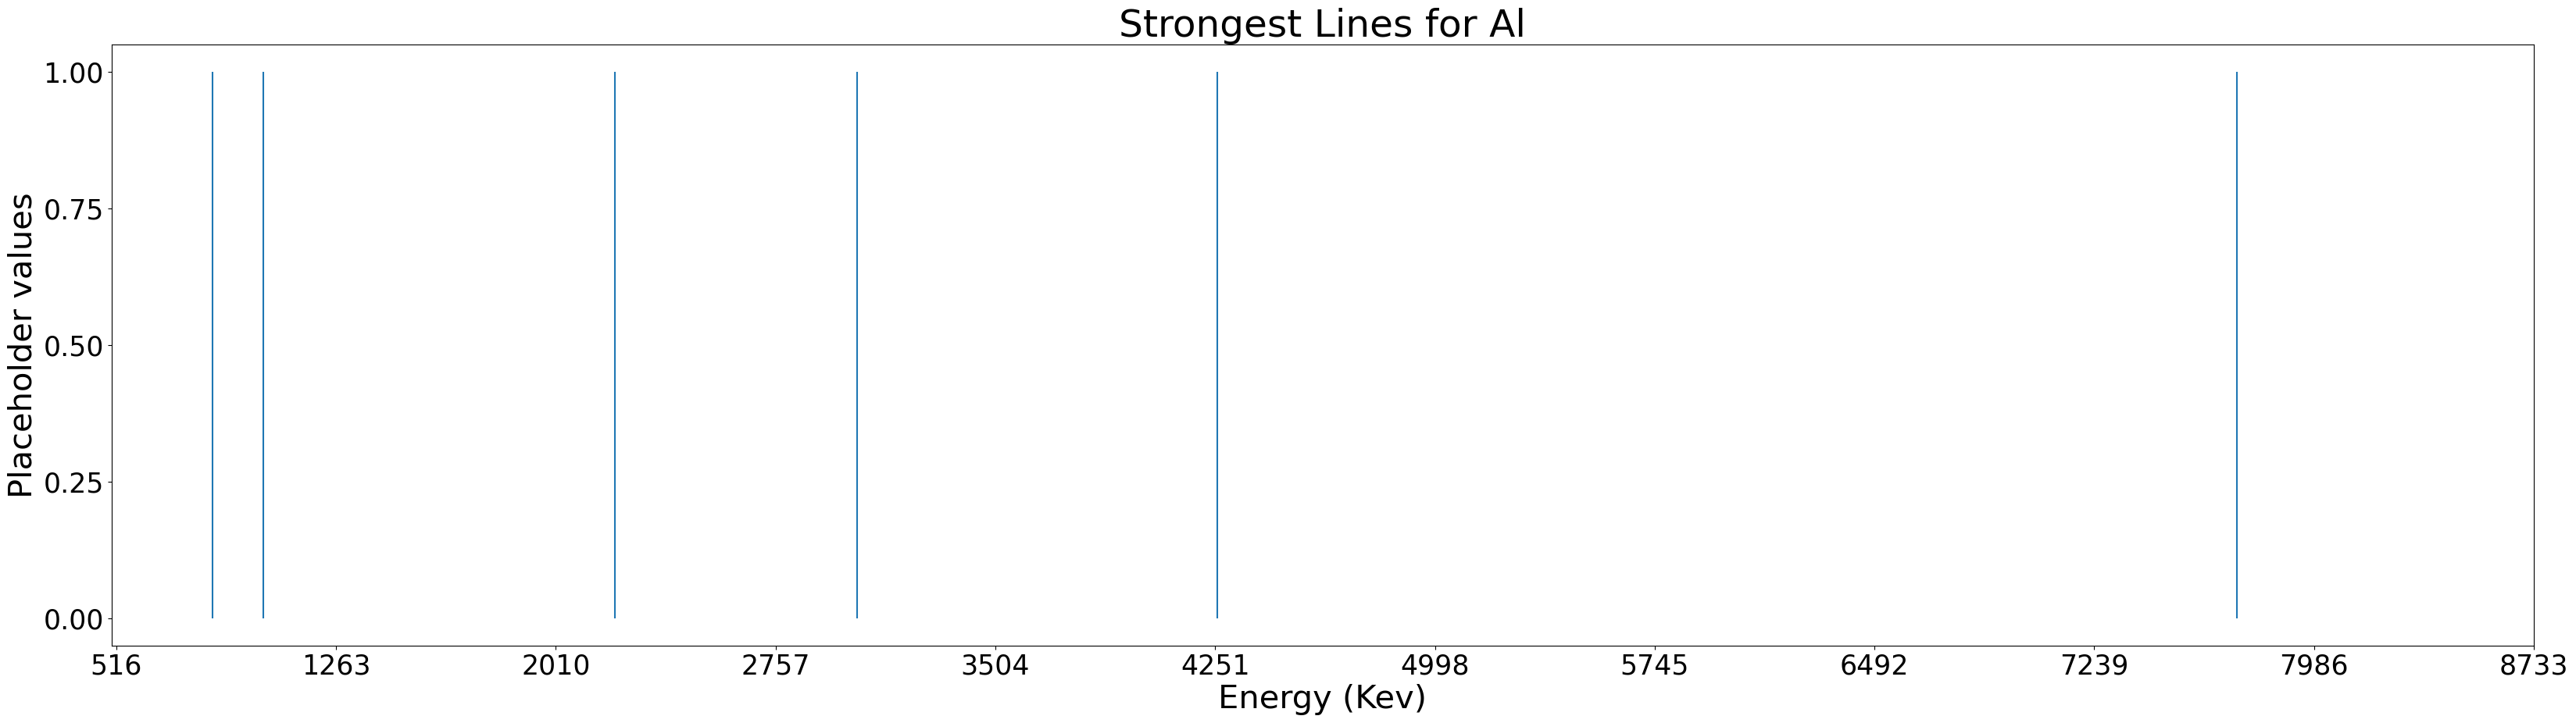

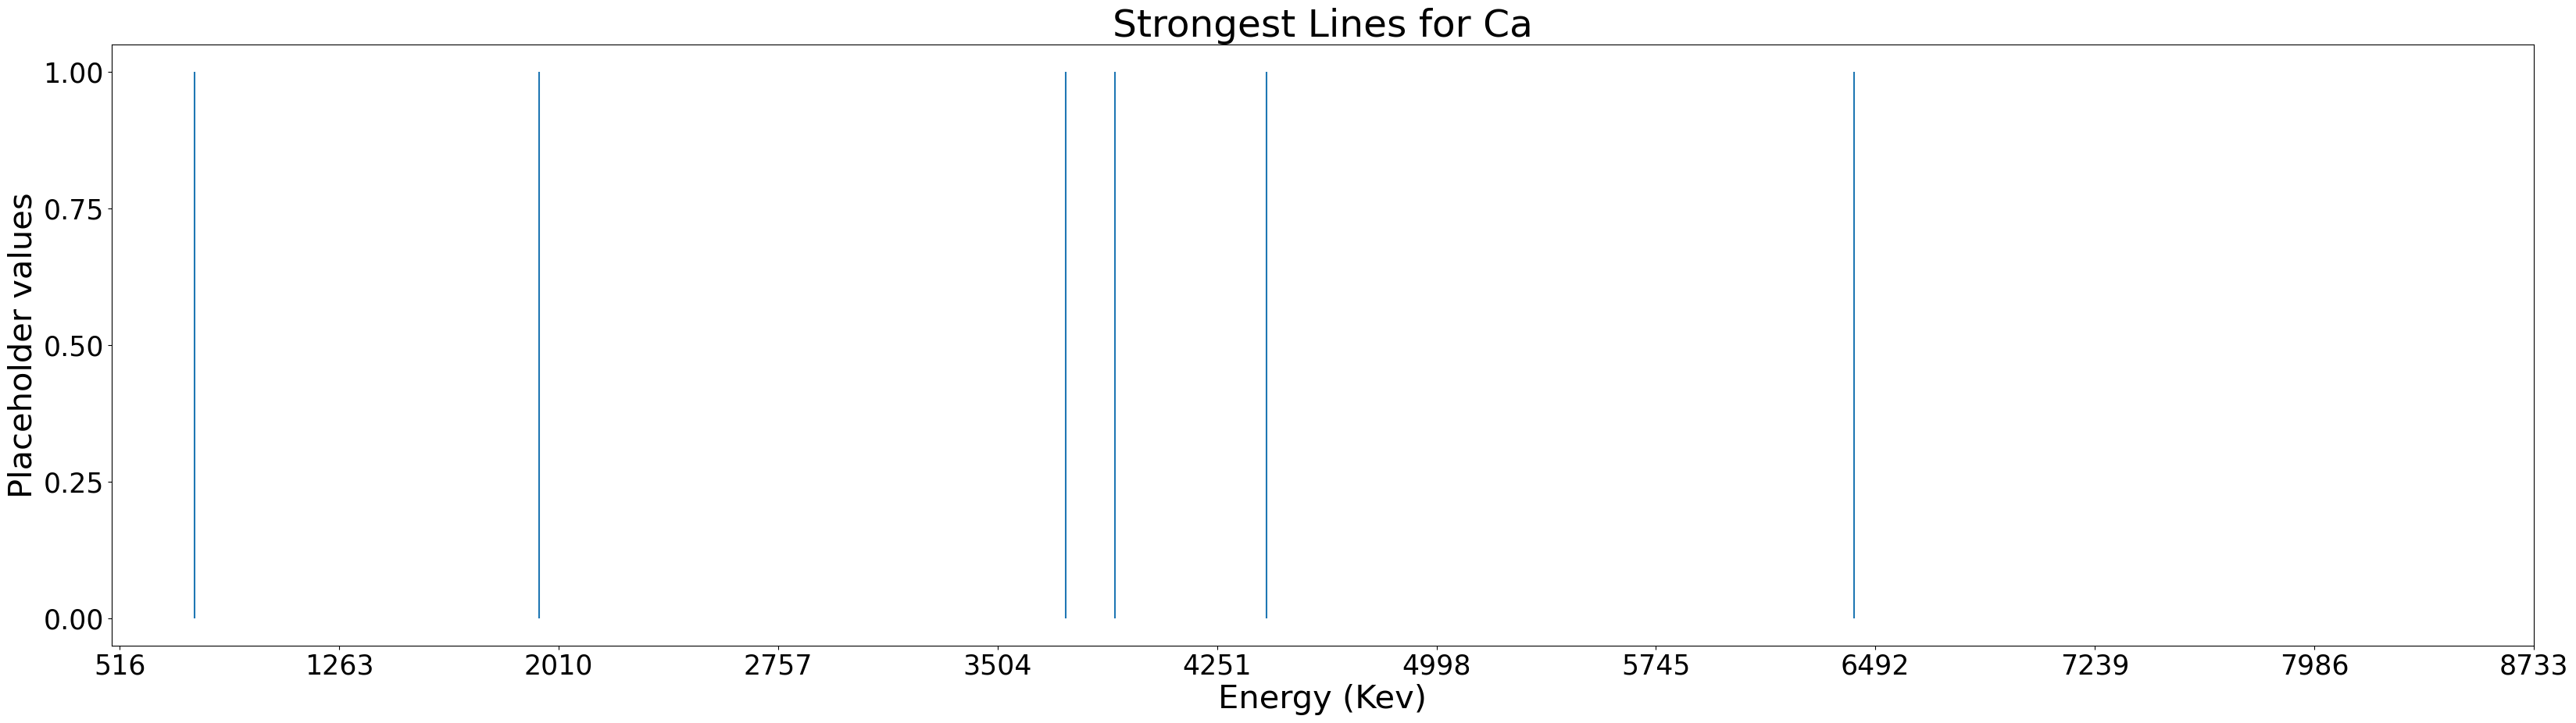

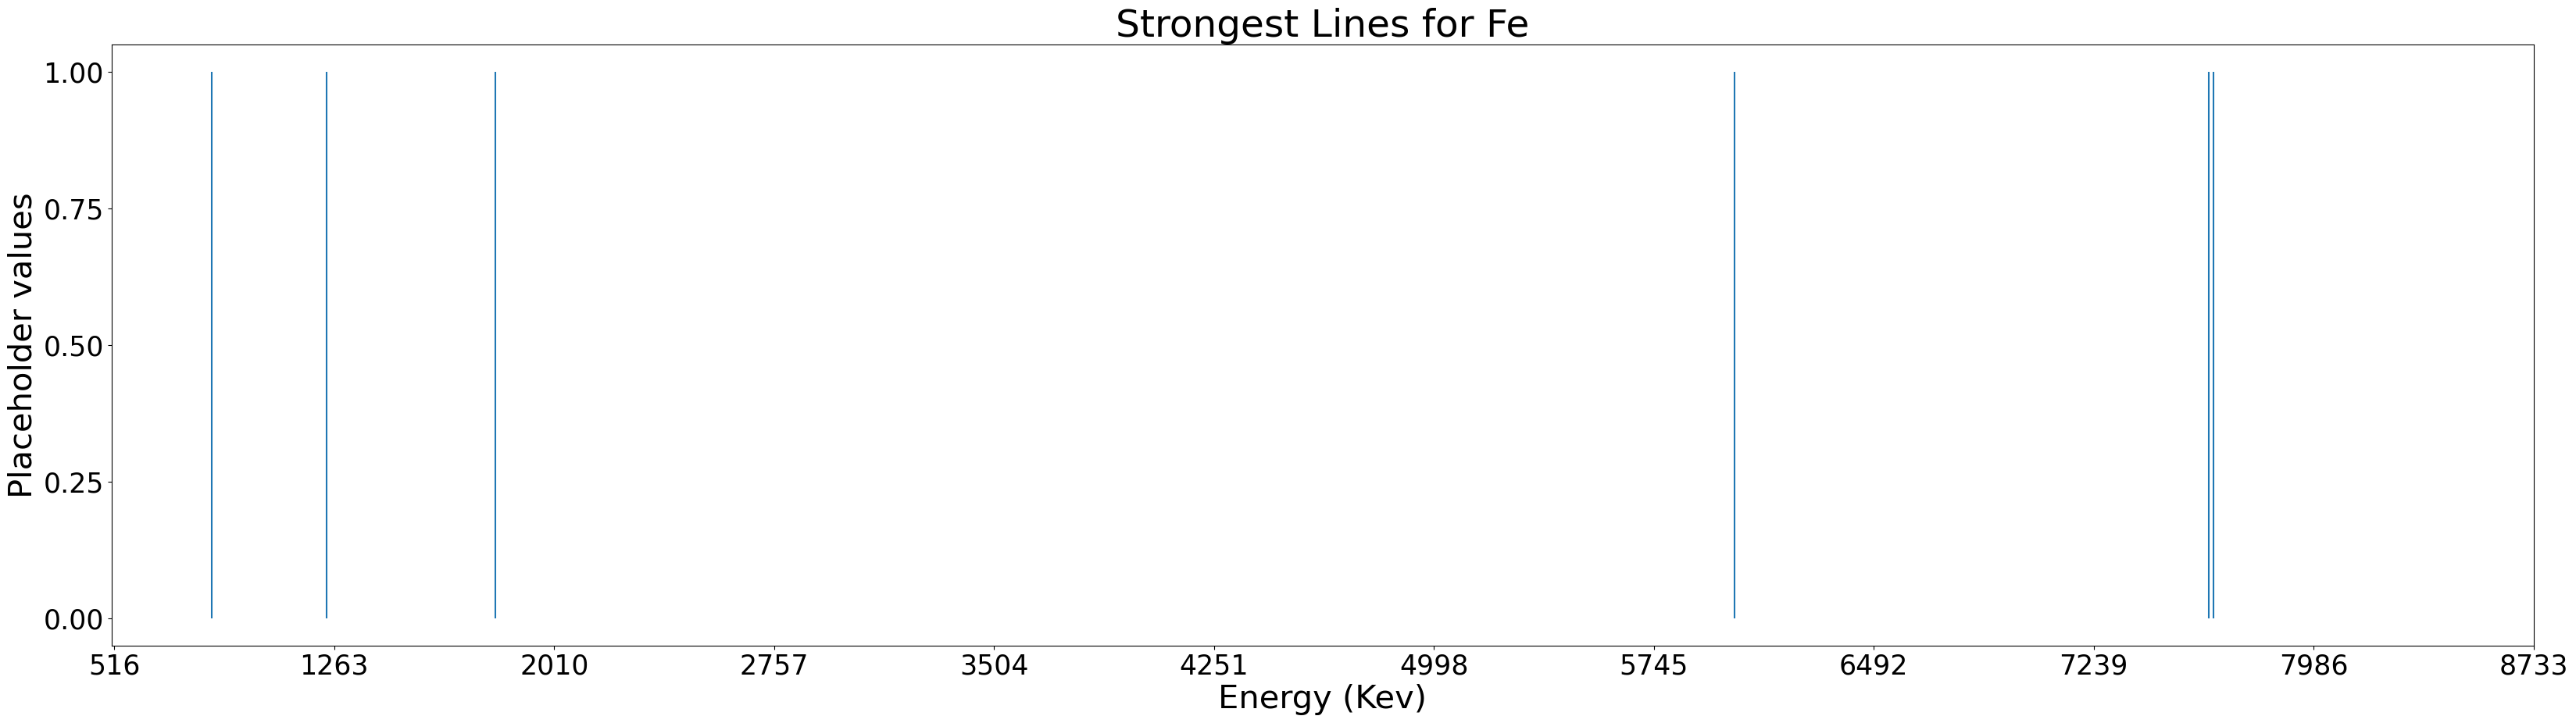

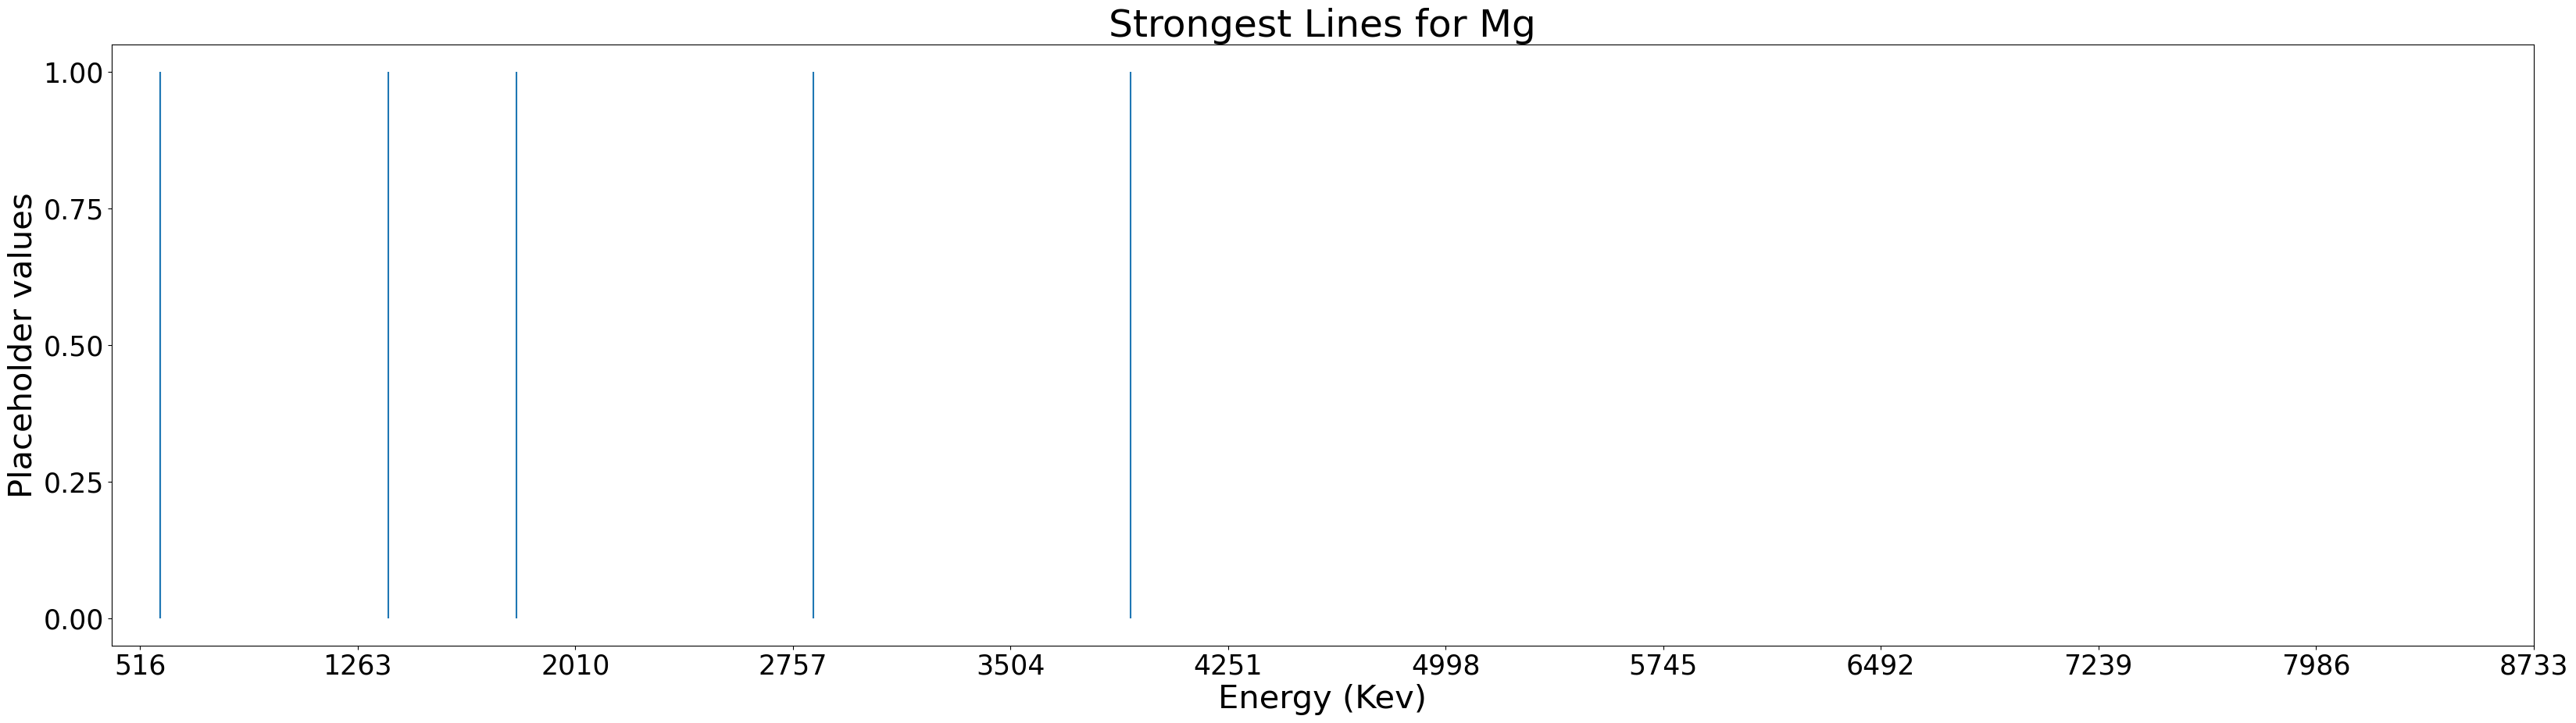

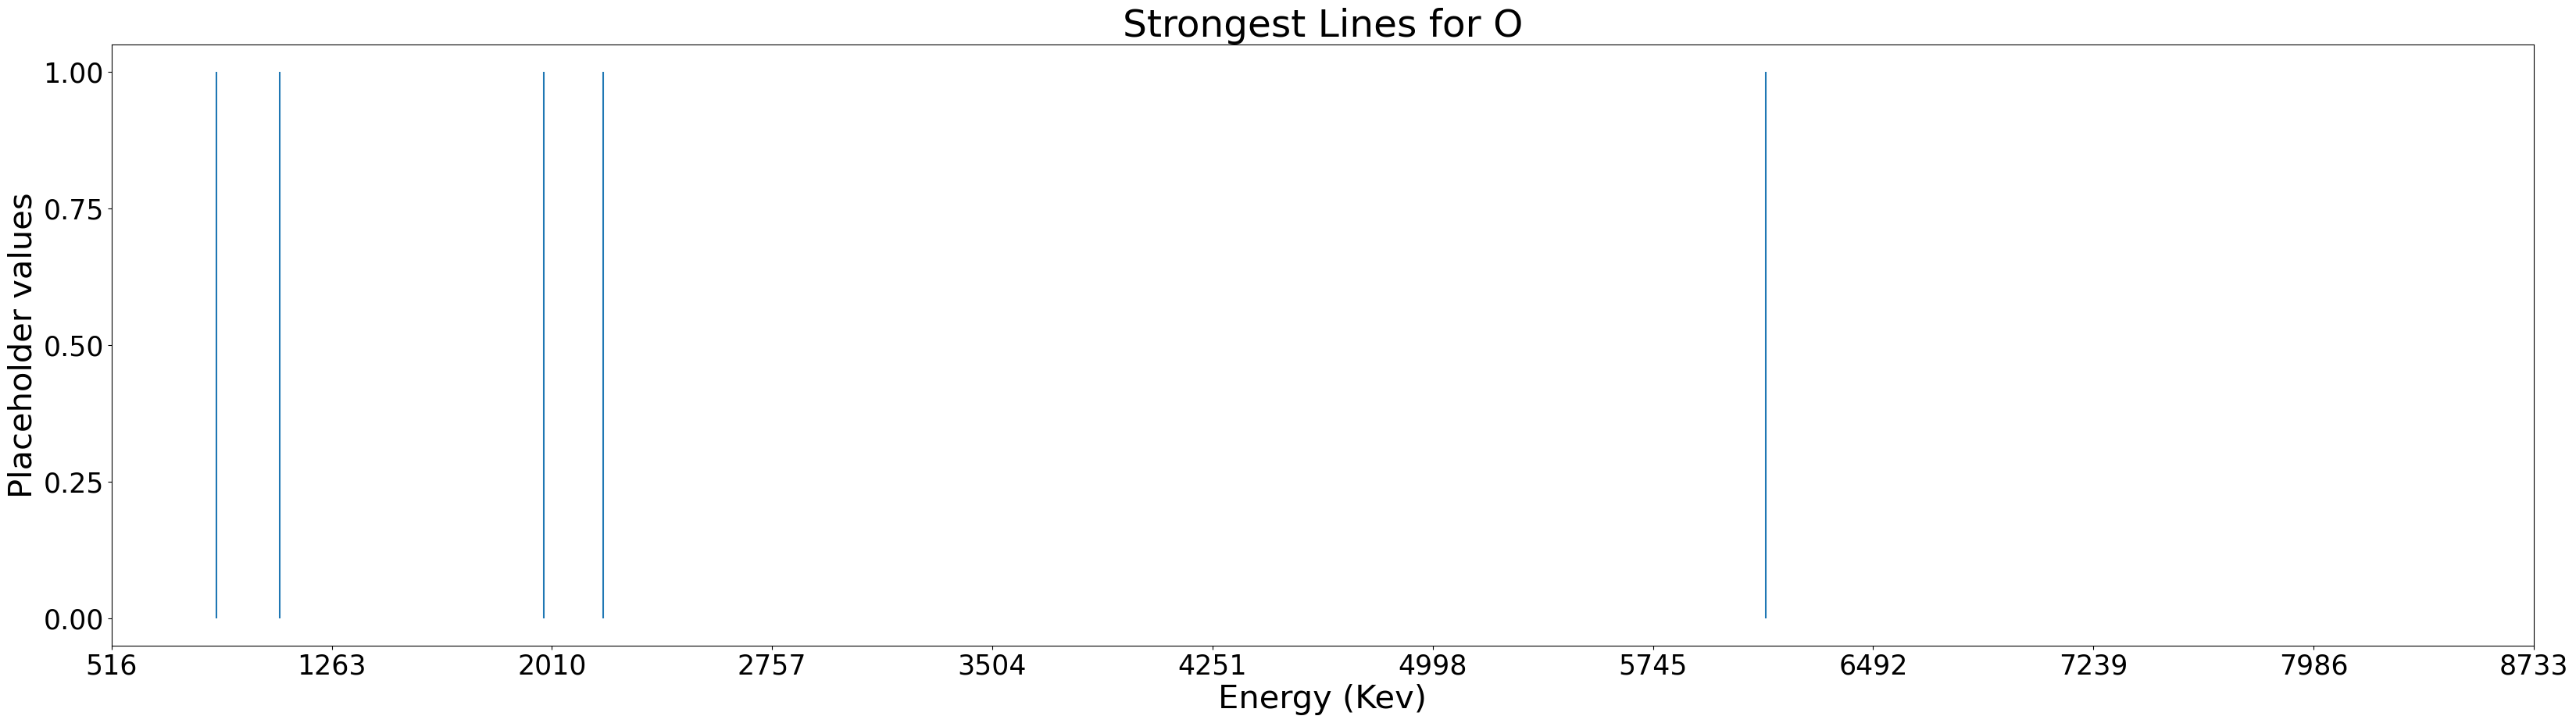

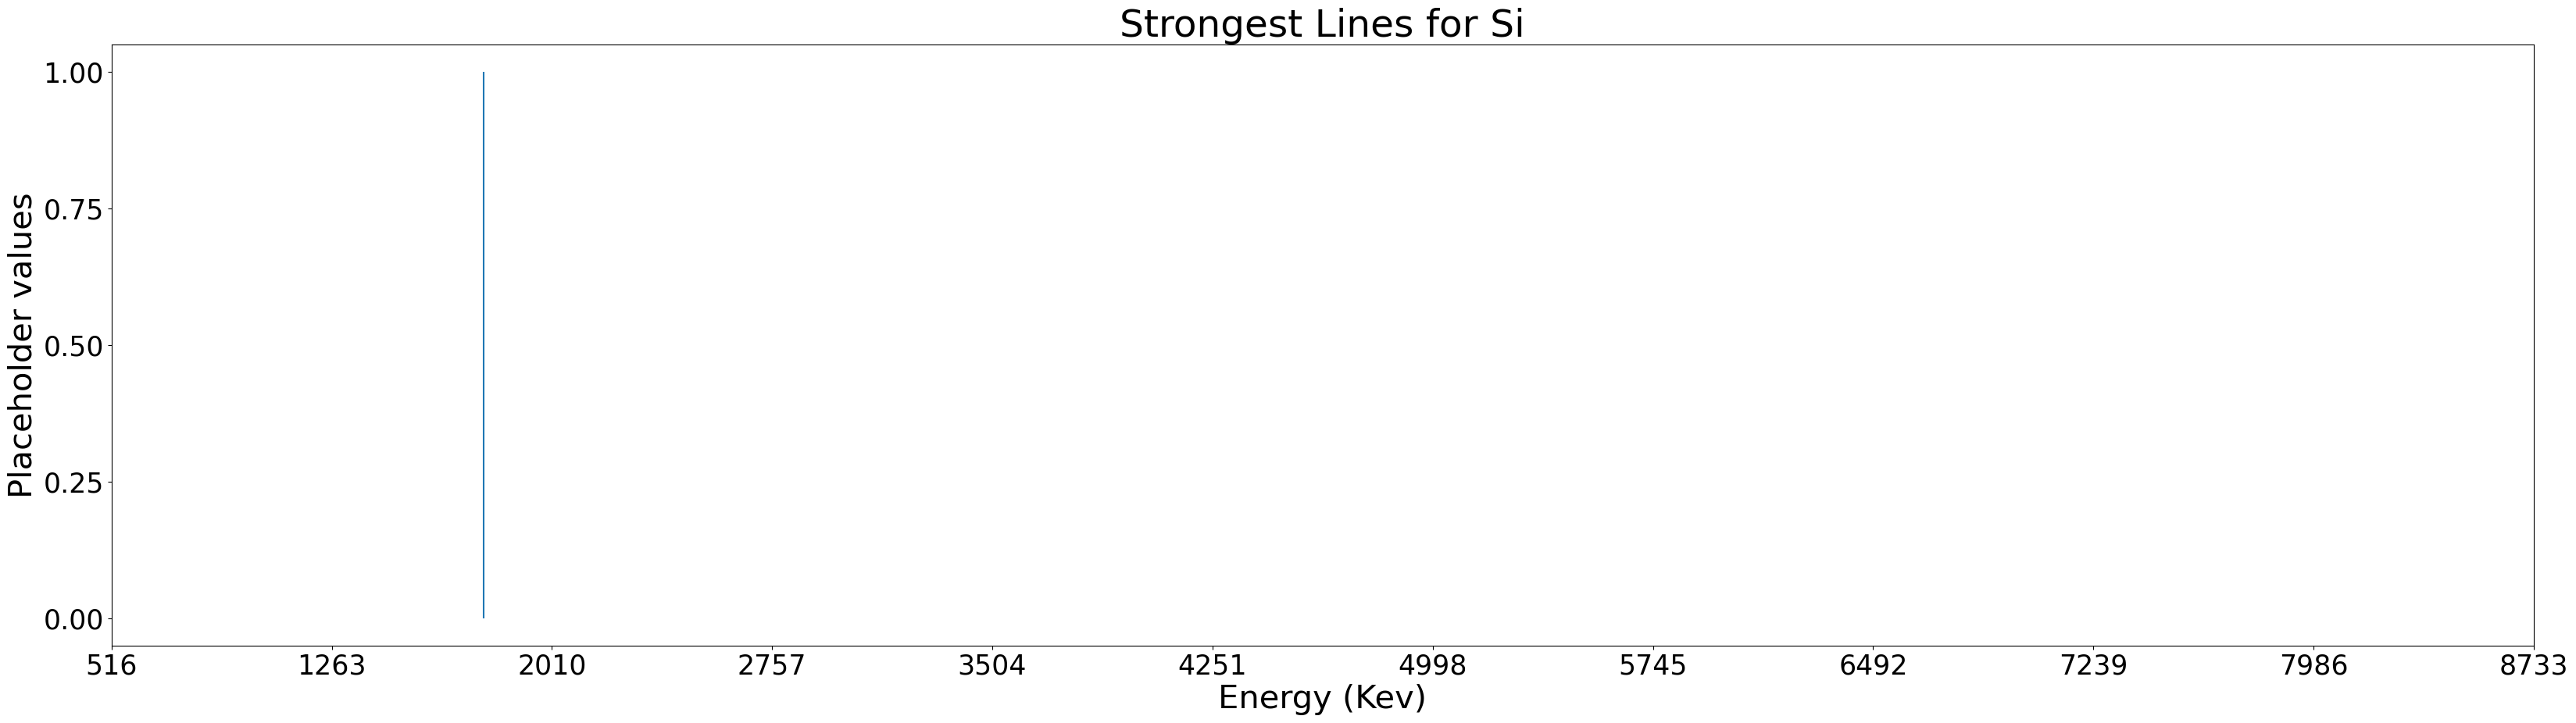

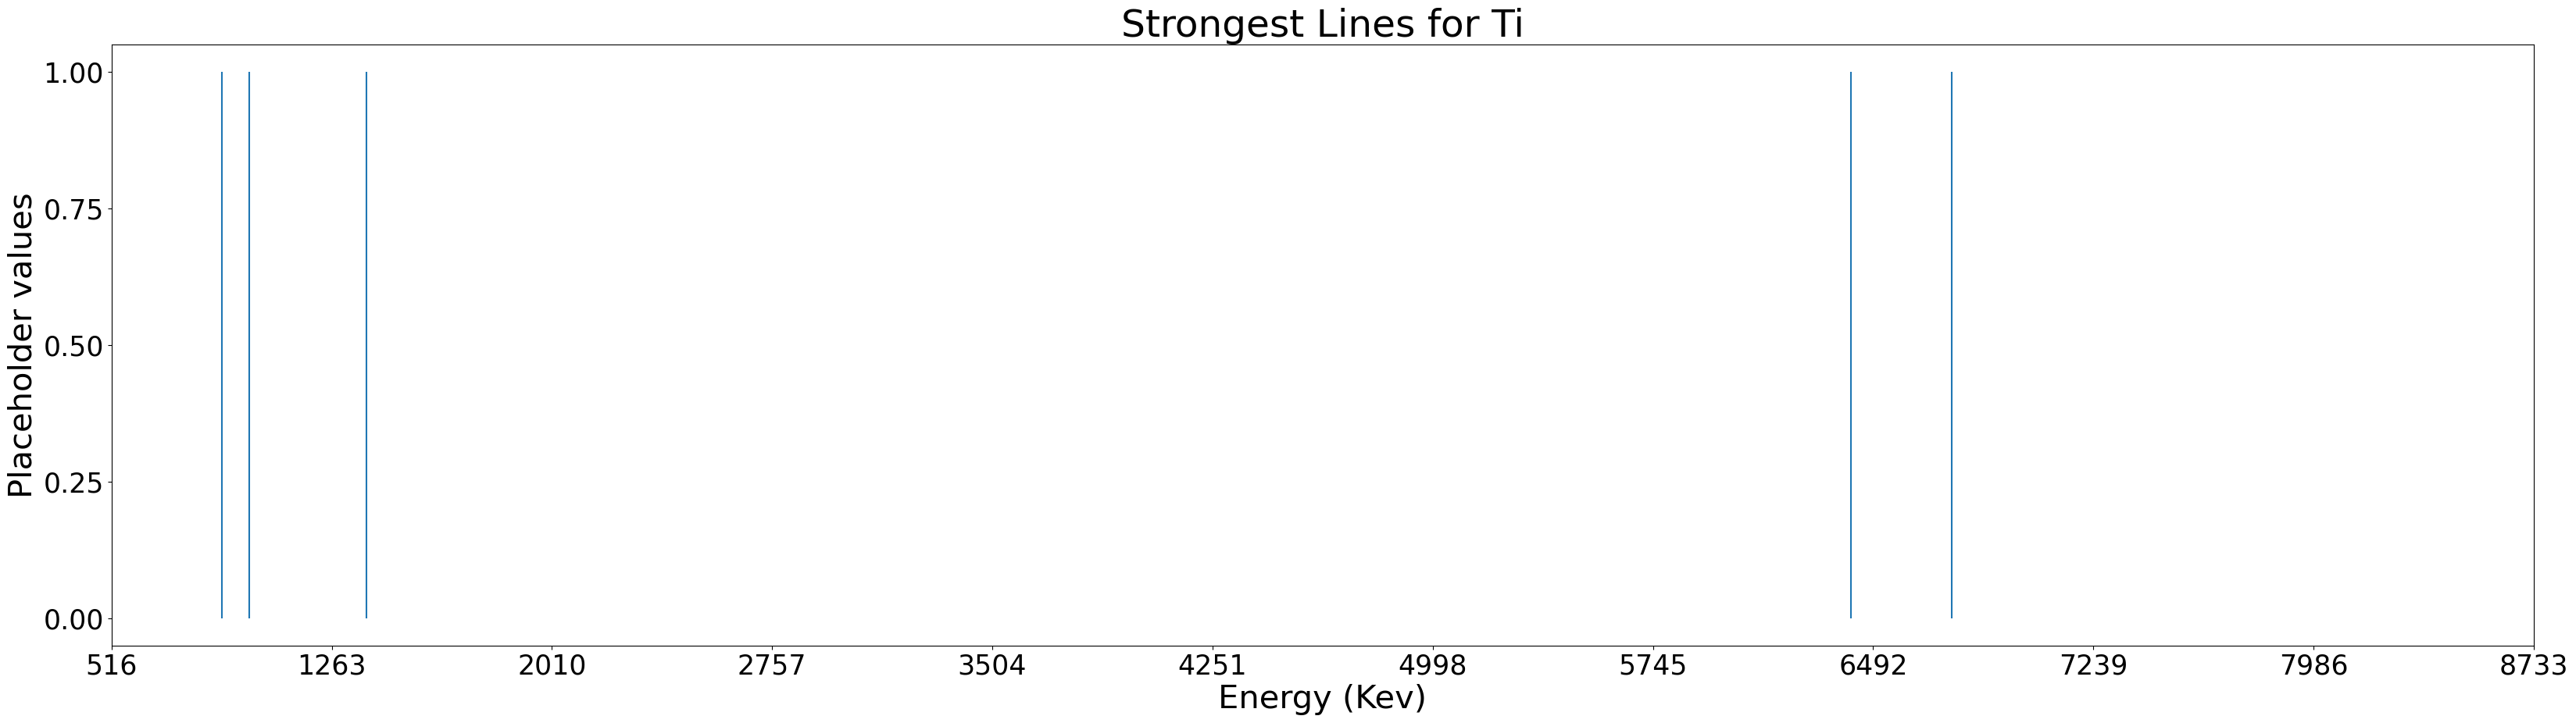

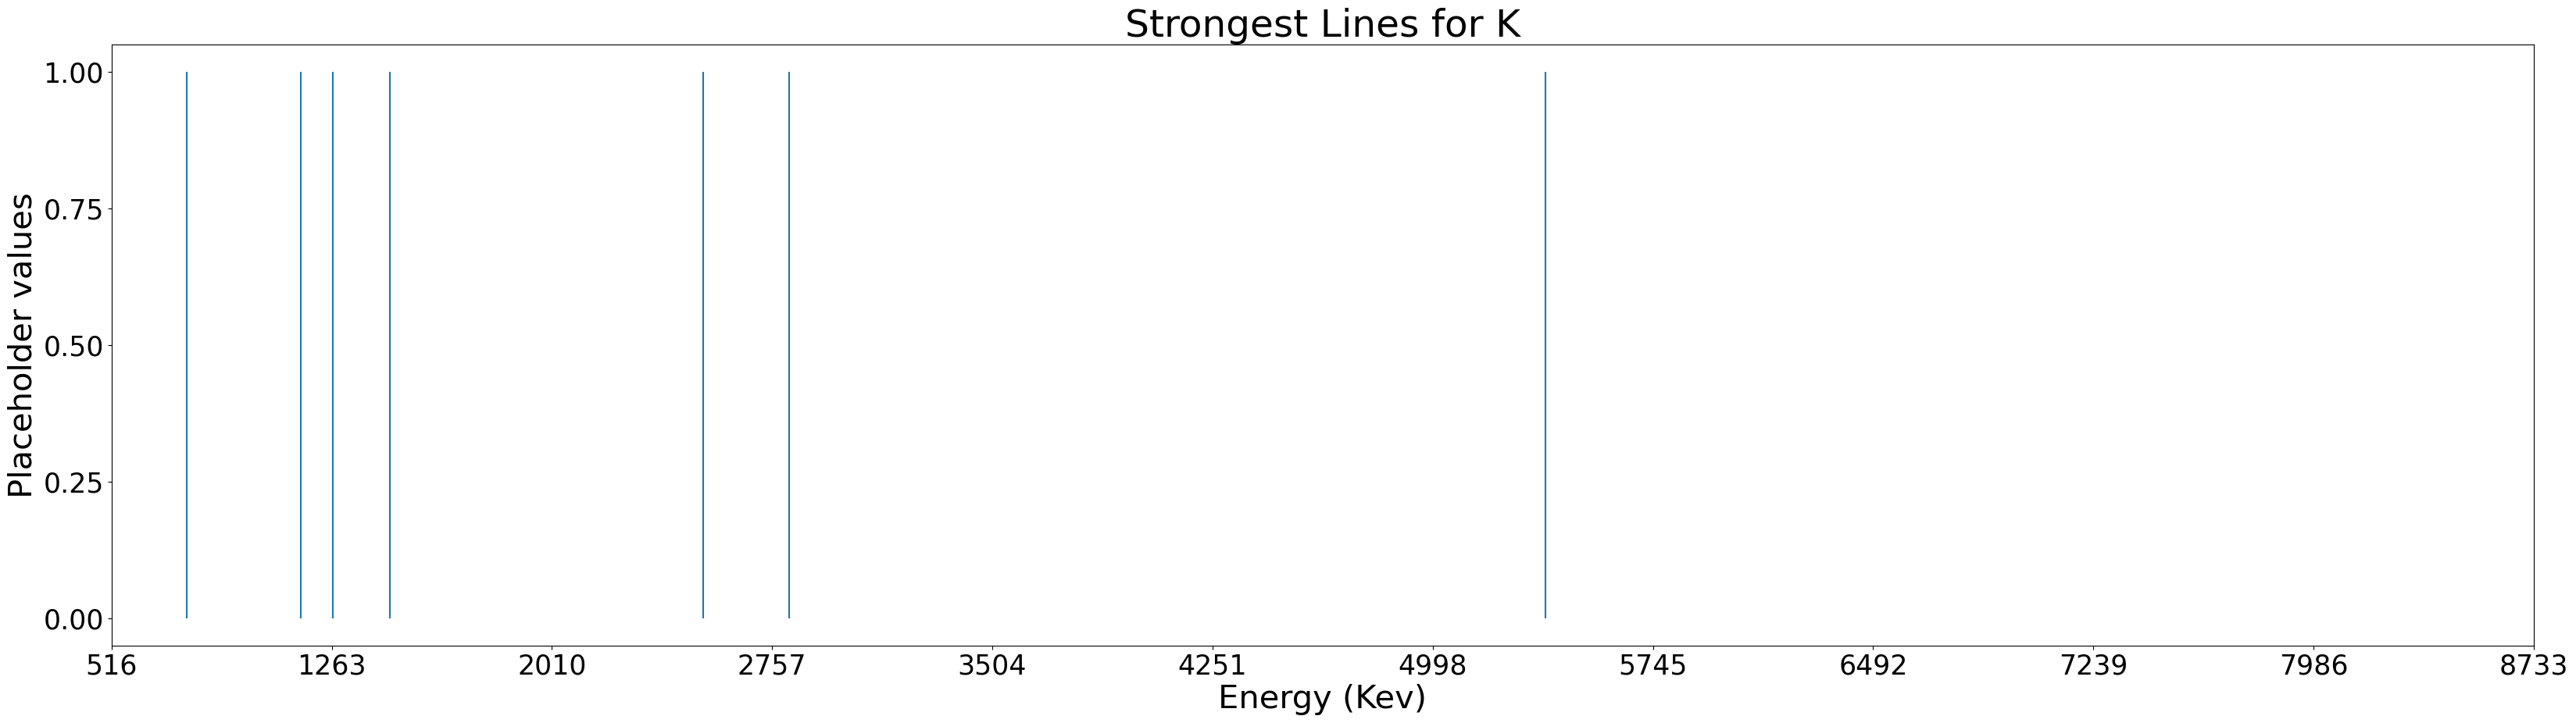

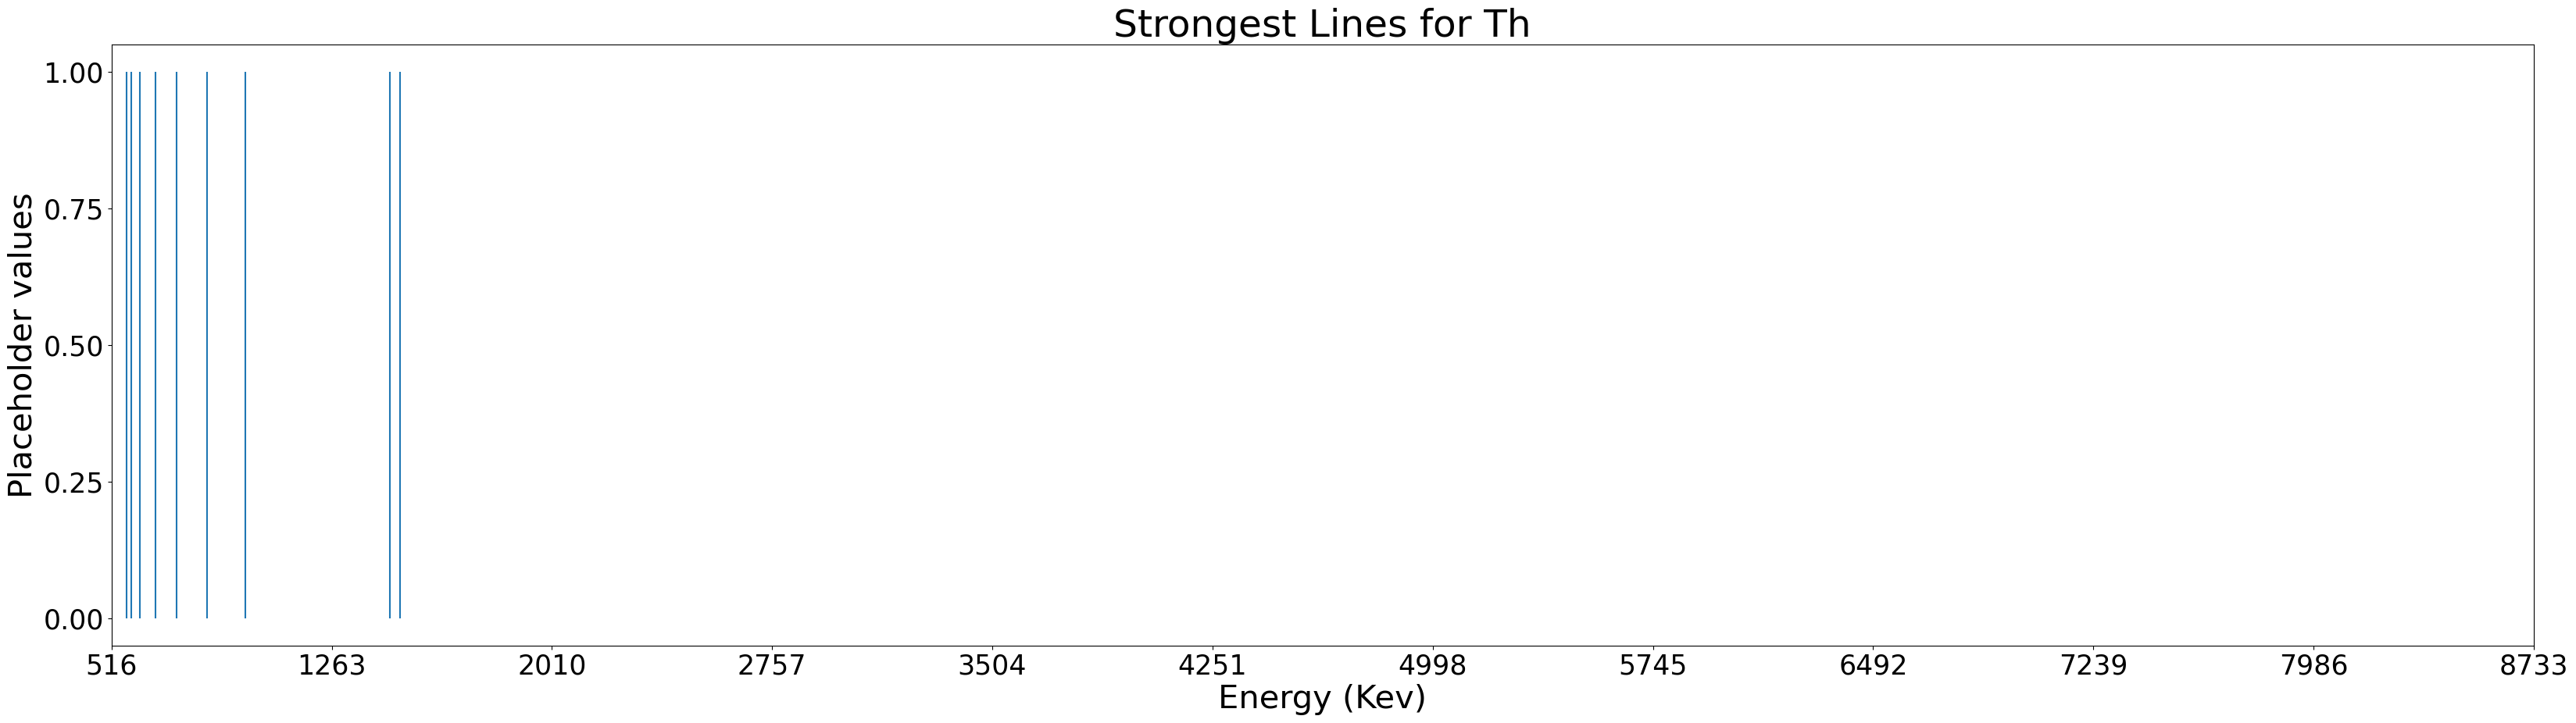

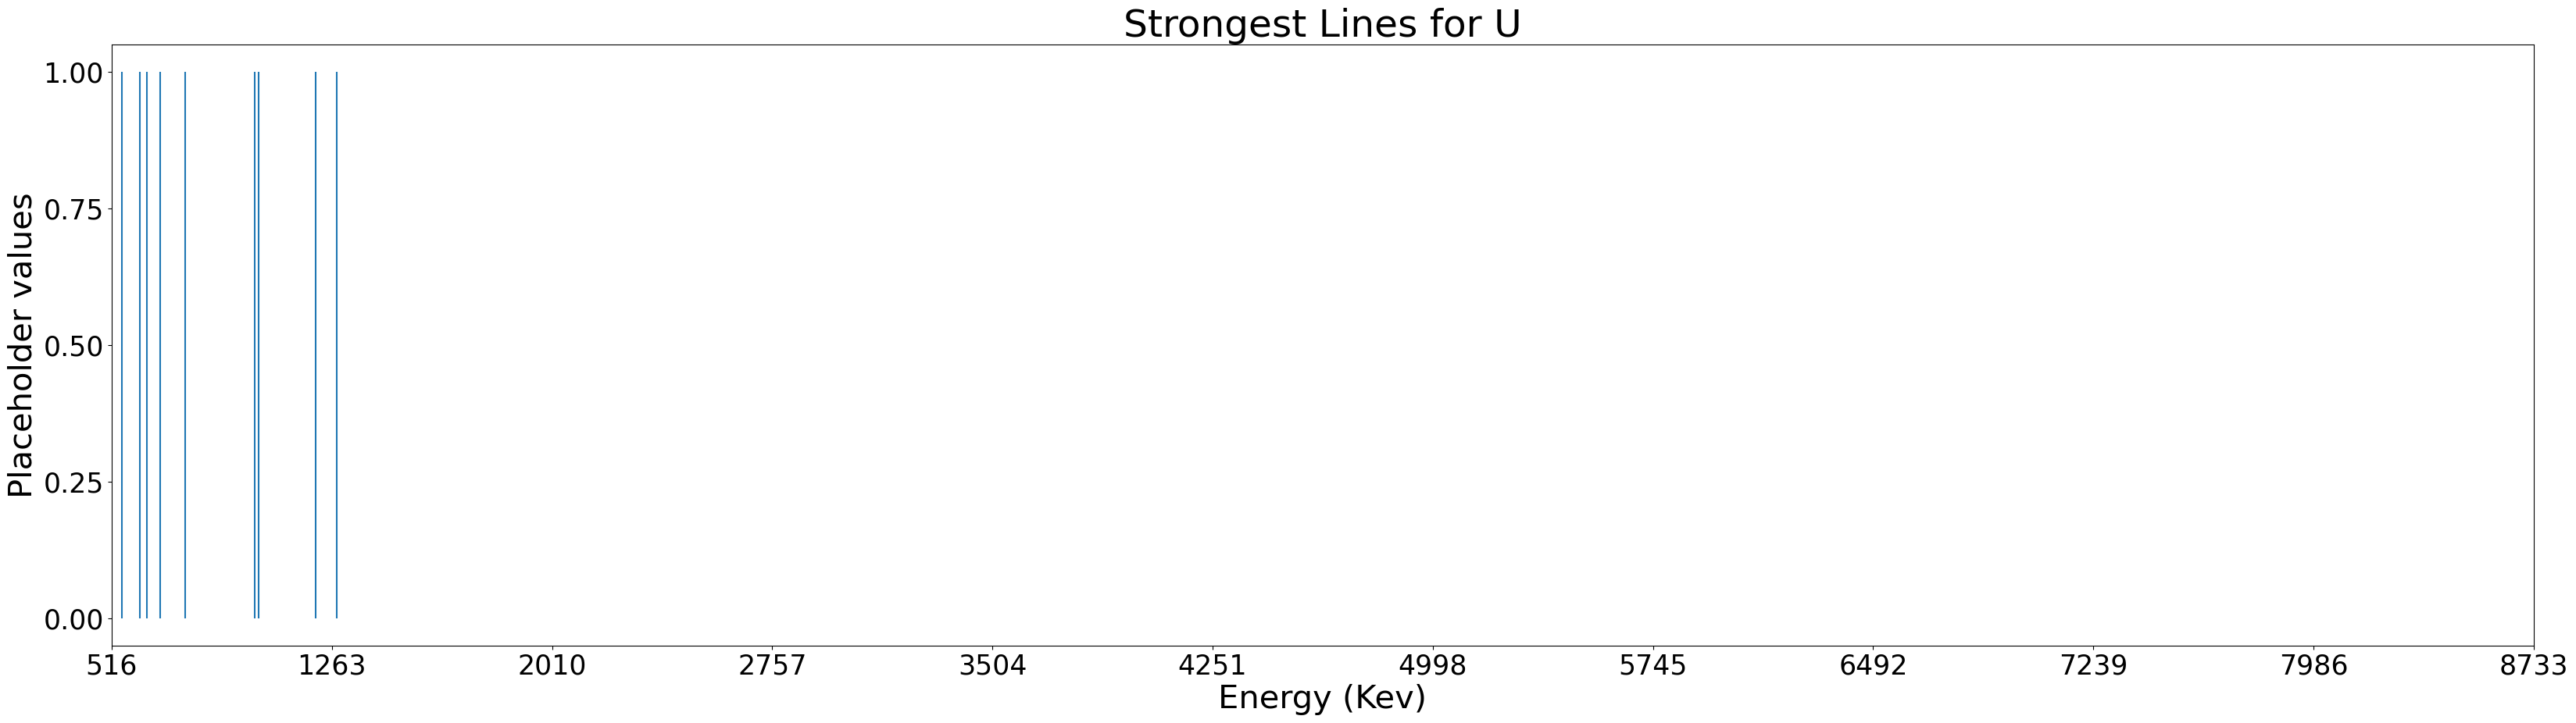

In [12]:
#iterate through the elements of interest
for currentElement in elementsOfInterest:
    #get the lines for the current element
    currentElementFrame=selectedLinesDataframe[selectedLinesDataframe['Element']==currentElement]
    #plot the lines on a figure
    
    #create a figure
    plt.figure(figsize=(40,10))
    #plot the lines
    plt.vlines(x=currentElementFrame['Energy (keV)'],
               ymin=0,
               ymax=1)
    #add ticks on the x and y axis
    plt.xticks(np.arange(relaventEnergyBands[0],
                         relaventEnergyBands[-1]+np.ptp(relaventEnergyBands)//10,
                         np.ptp(relaventEnergyBands)//10),
               fontsize=25)
    
    plt.yticks(np.arange(0,1.1,0.25),
               fontsize=25)
    #add labels to the two axis
    plt.xlabel("Energy (Kev)",
               fontsize=30)
    plt.ylabel("Placeholder values",
               fontsize=30)
    #add a title
    plt.title("Strongest Lines for "+currentElement,
              fontsize=35)
    
    